In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Hypothetically loading a dataset
data = pd.read_csv('manufacturing.csv')
data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [3]:
data.tail()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975
3956,163.359996,24.332133,3974.897121,41092.392901,4.358913e+06,100.000000


In [4]:
# X = data[['Energy_Consumption', 'Renewable_Percentage', 'GDP']]
# y = data['CO2_Emissions']

X = data.drop('Quality Rating', axis=1)
y = data['Quality Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Define the degree of the polynomial
# You can adjust the degree as needed
poly = PolynomialFeatures(degree=3)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [6]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_poly_test)

In [8]:
y_pred 

array([ 18.99656802, 101.07346165,  98.63592157,  99.73838864,
       101.09985222, 100.04780779, 100.0271424 , 100.04085711,
        99.08890967,  55.26033419,  98.2796446 ,  99.88090777,
        98.38924174, 100.70854132, 100.95073044,  99.79436518,
        99.38060179,  98.12240384,  99.80271465, 101.40976347,
        98.4189208 , 102.6763929 ,  99.8842612 ,  52.03088192,
        98.0707794 ,  46.17177254,  99.55218078, 100.29367358,
        99.45054141,  98.51504641,  99.31152552,  98.9210474 ,
       100.20901701, 101.11444613,  99.53837924, 101.71472999,
       100.17332719, 101.15543044, 100.26245841, 100.2446082 ,
       100.23458338, 101.77242865,  43.68204946, 101.75300416,
        99.54843605,  99.59310361,  98.17796288,  48.59746935,
        98.15103948,  98.61595714, 102.22363228,  99.87544337,
        99.8791713 ,  60.15083985,  29.32816189,  98.75576226,
       100.63298851, 100.5048002 ,  99.58245124, 101.34280371,
       100.03647471,  99.44383319,  98.0152795 ,  99.49

In [9]:
# Calculate Mean Squared Error or R² Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 4.99129242655502
R² Score: 0.9755509302881403


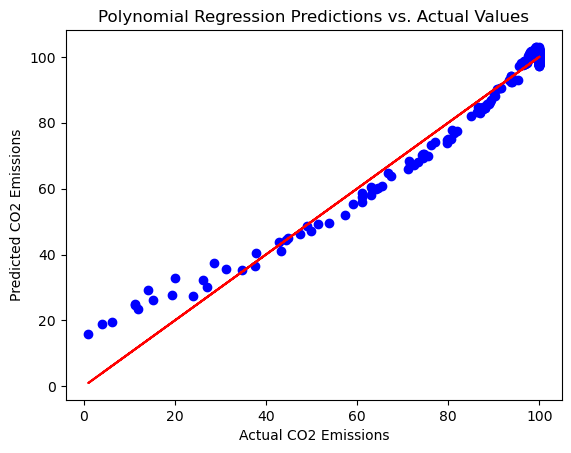

In [10]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # 45-degree line
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Polynomial Regression Predictions vs. Actual Values')
plt.show()

In [11]:
import joblib
# Save the model to a file
joblib.dump(model, 'polynomialRegModel_m.pkl')

['polynomialRegModel_m.pkl']